<img src="https://www.dhi-paris.fr/fileadmin/templates/dhi-paris/images/logo.png" />   <img src="https://www.science-accueil.org/wp-content/uploads/2018/03/1200px-Logo-inha-300x105.jpg" />


### Jupyter Notebook : L'Annuaire des Allemands à Paris de 1854 : sur les traces de la migration germanophone dans le quartier Richelieu
### Séminaire : Documenter l'histoire urbaine, architecturale, sociale et culturelle du quartier Richelieu (1750-1950)

<strong>Présentation : </strong>

<ul>. Mareike Koenig</ul>
<ul>. Gérald Kembellec</ul>
<ul>. Evan Virevialle</ul>
    

In [1]:
import pandas as pd
import folium
from folium.features import GeoJson, GeoJsonTooltip
from folium import plugins, FeatureGroup, LayerControl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
import numpy as np

### Description du dataset
Le dataset ci-dessous représente les allemands figurant dans l'annuaire des allemands de 1854 mais aussi apparaissant dans le quartier Richelieu.  
Pour obtenir ce résultat, une requête SQL a été effectuée dans le serveur de la base de données Adressbuch pour avoir la liste des personnes dans le quartier Richelieu selon leurs coordonnées GPS.  
Le quartier Richelieu a été géoréférencé approximativement avec l'outil en ligne <a href="https://geojson.io" target="blank">geojson.io</a> qui nous permet de réaliser des polygones sur des cartes interractives.<br>Le quartier Richelieu a été modélisé selon les délimitations faites par l'Institut National d'Histoire de l'Art, c'est-à-dire entre Louvres, la Place des Victoire et l'Opéra.

In [2]:
def csv():
    """
    on importe le csv   
    """
#premier dataset les personnes du quartier rcihelieu

file = 'C:/Users/evirevialle/richelieu32.csv'
data = pd.read_csv(file, sep = ',')
columns_number=data.shape[1]
data

,id,surname,first_name,gender,name,norm,profession_verbatim,OhdAB_01,houseno,adresses,lat,long,name_old_clean,name_new
0,779,Acker,Unbekannt,M,Handel,Papierhändler/in,Papierhändler,"Kaufmännische Dienstleistungen, Warenhandel, V...",29,29 Rue Neuve des Petits Champs,48.866692,2.336970,rue Neuve-des-Petits-Champs,rue des Petits-Champs
1,782,Adam,Unbekannt,F,Handel,Kleiderhändler/in,Kleider,"Kaufmännische Dienstleistungen, Warenhandel, V...",26,26 Rue de Richelieu,48.865315,2.336706,rue de Richelieu,rue de Richelieu
2,784,Alber und Keimel,Unbekannt,Unbekannt,Handel,Schneider/in,Schneider,"Rohstoffgewinnung, Produktion und Fertigung",74,74 Rue de Richelieu,48.869373,2.338866,rue de Richelieu,rue de Richelieu
3,788,Anicker,Unbekannt,M,Handel,Schneider/in,Schneider,"Rohstoffgewinnung, Produktion und Fertigung",9,9 Rue Vivienne,48.867834,2.339433,rue Vivienne,rue Vivienne
4,2135,Arnold,Unbekannt,M,Adel,Speisewirt/in,Speisewirth,"Kaufmännische Dienstleistungen, Warenhandel, V...",40,40 Rue Croix des Petits Champs,48.864328,2.340314,rue Croix-des-Petits-Champs,rue Croix-des-Petits-Champs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1597,Wirth,Unbekannt,M,Handel,Warenlagerist/in,Lager schweizer Holzfiguren,"Verkehr, Logistik, Schutz und Sicherheit",17,17 boulevard des Italiens,48.871400,2.337000,boulevard des Italiens,boulevard des Italiens
527,4254,Wolter-Frings,Unbekannt,M,Handel,Schneider/in,Schneider,"Rohstoffgewinnung, Produktion und Fertigung",27,27 Place de la Bourse,48.869200,2.341390,Place de la Bourse,Place de la Bourse
528,1630,Wurtel,F.,M,Handel,Uhrenhändler/in,"Taschen-, Stand- u. Musikuhren-, Wecker- u. Mu...","Kaufmännische Dienstleistungen, Warenhandel, V...",38,38 Galerie Vivienne,48.866700,2.339720,Galerie Vivienne,Galerie Vivienne
529,2099,Zerr,Unbekannt,M,Handel,Schuhmacher/in,Schuhmacher,"Rohstoffgewinnung, Produktion und Fertigung",8,8 galerie Colbert,48.868400,2.339740,galerie Colbert,rue Vivienne


In [3]:
#deuxième dataset base de données entière

file2 = 'C:/Users/evirevialle/dataset.csv'
full_data = pd.read_csv(file2, sep= ',')
columns = full_data.shape[1]
full_data

,id,surname,first_name,gender,profession_verbatim,name,norm,OhdAB_01,name_old_verbatim,name_new,geo_long,geo_lat
0,774,Aaron,Unbekannt,M,Bronzehändler,Handel,Bronzehändler/in,"Kaufmännische Dienstleistungen, Warenhandel, V...",Choiseul,passage Choiseul,2.33575,48.8690
1,2257,Aaron,Mich.,M,Porzellanfabrik,Handwerk,Porzellanmacher/in,"Rohstoffgewinnung, Produktion und Fertigung",de Bondy,rue René-Boulanger,2.35917,48.8688
2,2256,Aaron,Unbekannt,M,Speisewirth,Adel,Speisewirt/in,"Kaufmännische Dienstleistungen, Warenhandel, V...",Marie Stuart,rue Marie-Stuart,2.34766,48.8650
3,4028,Abel,Unbekannt,M,coke et escarbilles,Handel,Koch/Köchin,"Rohstoffgewinnung, Produktion und Fertigung",d' Austerlitz St Marcel,rue Esquirol,2.36046,48.8349
4,773,Abel,Unbekannt,M,Orgelspieler,Selbstständig,Orgelspieler/in,"Sprach-, Literatur-, Geistes-, Gesellschafts- ...",Fontaine Saint Georges,rue Pierre-Fontaine,2.33404,48.8817
...,...,...,...,...,...,...,...,...,...,...,...,...
4767,2501,Zugenbühler,Unbekannt,M,Arzt,Handwerk,Arzt/Ärztin,"Gesundheit, Soziales, Lehre und Erziehung",Du Faubourg Saint Martin,rue du Faubourg-Saint-Martin,2.36094,48.8767
4768,2480,Zugenbühler,Unbekannt,F,Lehranstalt,Selbstständig,Anstaltslehrer/in,"Gesundheit, Soziales, Lehre und Erziehung",Du Faubourg Saint Martin,rue du Faubourg-Saint-Martin,2.36094,48.8767
4769,2823,Zürcher,Unbekannt,M,Küfer,Handwerk,Küfer/in,"Rohstoffgewinnung, Produktion und Fertigung",Aux Ours,rue Étienne Marcel,2.34617,48.8645
4770,1669,Zürcher,Unbekannt,M,Arzt,Handwerk,Arzt/Ärztin,"Gesundheit, Soziales, Lehre und Erziehung",de l' Evêque,avenue de l'Opéra,2.33382,48.8671


### Cartographie
Vous pouvez voir ci-dessous la représentation  géographique et historique de Paris ainsi que du quartier Richelieu.  
Le quartier est représenté par le polygone que nous avons créé.  
Les marqueurs représentent les personnes habitant dans ce polygone.  
La carte hsitorique provient du <a href="https://www.geoportail.gouv.fr/#" target="blank">géoportail</a> du gouvernement. Il s'agit de la carte de la France provenant de l'Etat-Major de 1820-1866.  
La carte est réalisée avec la librairie <a href="https://python-visualization.github.io/folium/" target="blank">folium</a>

In [4]:
def basemap():
  """
  This cell creates base map with Folium. Folium makes to visualize an interractive map with LeafletMap
  """
map = folium.Map(
    location=[48.8566969, 2.3514616], 
    zoom_start= 16,
    max_zoom=25,
    control_scale=False, 
    max_bounds=False,
    max_lat=48.813141, max_lon=2.234129, 
    min_lat=48.908715, min_lon=2.422941,
    
    )     
map.fit_bounds([[48.813141,2.234129],[48.908715,2.422941]])

cluster = folium.plugins.MarkerCluster().add_to(map)

folium.raster_layers.TileLayer(
    tiles="https://wxs.ign.fr/cartes/geoportail/wmts?" + "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0" +
        "&STYLE=normal" +
        "&TILEMATRIXSET=PM" +
        "&FORMAT=image/jpeg"+
        "&LAYER=GEOGRAPHICALGRIDSYSTEMS.ETATMAJOR40"+
    "&TILEMATRIX={z}" +
        "&TILEROW={y}" +
        "&TILECOL={x}", 
        name="Carte d'Etat Major 1822-1866",
        attr='IGN-F/Geoportail'
        ).add_to(map)


folium.GeoJson(
    'richelieu.geojson', 
    style_function=lambda x:{'color':'black'},
    name='Quartier Richelieu').add_to(map)

folium.LayerControl().add_to(map)
for i in range(data.shape[0]):
    location=[data['lat'][i],data['long'][i]]
    legende= "<strong>Surname</strong> : " 
    legende+= data['surname'][i]
    legende+= "<br><strong>First name</strong> : "
    legende+= data['first_name'][i]
    legende+= "<br><strong>Profession</strong> : "
    legende+= data['profession_verbatim'][i]
    legende+= "<br><strong>Adresse</strong> : "
    legende+= data['adresses'][i]
    
  
    tooltip= folium.Tooltip(text=legende, style='color: green;')
    folium.Marker(location, popup=(legende), tooltip=tooltip).add_to(cluster)

map

### Statistiques et Visualisations

Les cellules que nous pouvons voir ci-dessous nous permettent de savoir comment est composé notre dataset.
Nous cherchons à savoir la proportion des hommes et des femmes, la répartition des catégories de métiers, la répartition des professions ainsi que le nombre de personnes selon la rue.  
Les visualtions sont réalisées avec la librairie <a href="https://pandas.pydata.org/" target="blank">pandas</a> et <a href="https://matplotlib.org/" target="blank">matplotlib</a>.

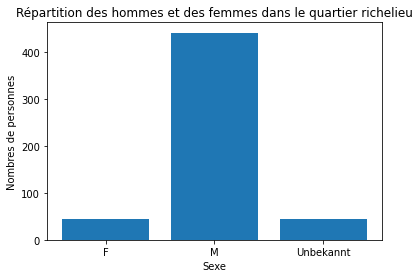

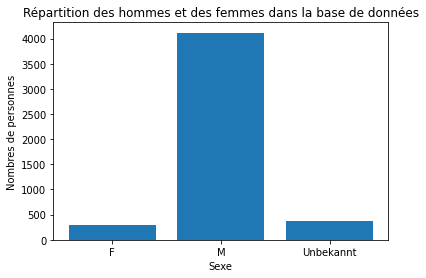

           gender
gender           
F              45
M             441
Unbekannt      45
           gender
gender           
F             286
M            4116
Unbekannt     370


In [5]:
#Genre des personnes dans le quartier Richelieu

gender = data.groupby('gender')[['gender']].count()
fig, ax = plt.subplots()
ax.bar(gender.index, gender['gender'])
plt.title('Répartition des hommes et des femmes dans le quartier richelieu')
plt.xlabel('Sexe')
plt.ylabel('Nombres de personnes')
plt.show()

#Genre des personnes dans la base de données

full_gender = full_data.groupby('gender')[['gender']].count()
fig, ax = plt.subplots()
ax.bar(full_gender.index, full_gender['gender'])
plt.title('Répartition des hommes et des femmes dans la base de données')
plt.xlabel('Sexe')
plt.ylabel('Nombres de personnes')
plt.show()
print(gender)
print(full_gender)

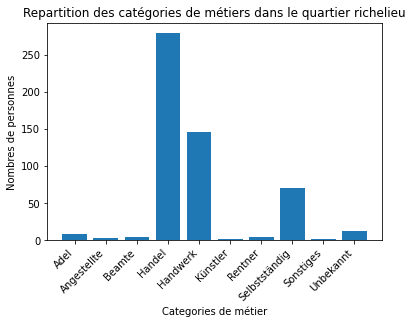

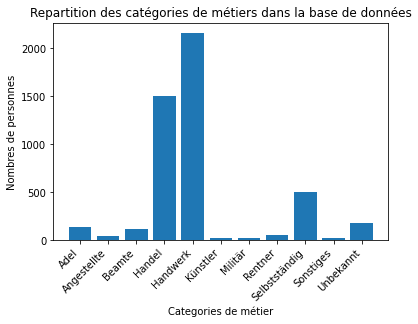

               name
name               
Adel              8
Angestellte       3
Beamte            5
Handel          279
Handwerk        146
Künstler          1
Rentner           5
Selbstständig    70
Sonstiges         2
Unbekannt        12
               name
name               
Adel            136
Angestellte      40
Beamte          119
Handel         1505
Handwerk       2157
Künstler         25
Militär          26
Rentner          53
Selbstständig   506
Sonstiges        26
Unbekannt       179


In [6]:
#Categories de métiers dans le quartier Richelieu

profcategories = data.groupby('name')[['name']].count()
fig, ax = plt.subplots()
ax.bar(profcategories.index, profcategories['name'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.title('Repartition des catégories de métiers dans le quartier richelieu')
plt.xlabel('Categories de métier')
plt.ylabel('Nombres de personnes')
plt.show()

#Categories de métiers dans la base de données

full_profcategories = full_data.groupby('name')[['name']].count()
fig, ax = plt.subplots()
ax.bar(full_profcategories.index, full_profcategories['name'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')
plt.title('Repartition des catégories de métiers dans la base de données')
plt.xlabel('Categories de métier')
plt.ylabel('Nombres de personnes')
plt.show() 
print(profcategories)
print(full_profcategories)

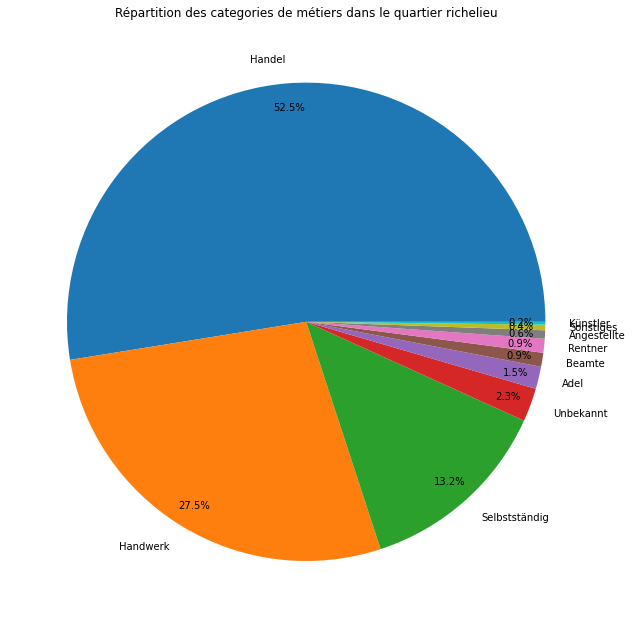

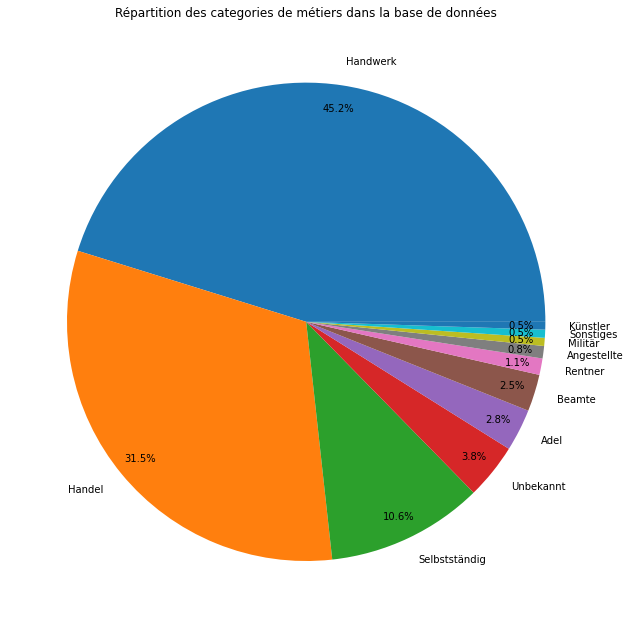

In [7]:
#pie chart des catégories de métiers dans le quartier Richelieu

count_prof_categories = data.value_counts('name')

plt.figure(figsize=(15,11))
plt.pie(count_prof_categories, labels=count_prof_categories.index ,autopct='%1.1f%%',pctdistance=0.9)
plt.title('Répartition des categories de métiers dans le quartier richelieu')
plt.show()

#pie chart des catégories de métiers dans la bases de données

full_count_prof_categories = full_data.value_counts('name')

plt.figure(figsize=(15,11))
plt.pie(full_count_prof_categories, labels=full_count_prof_categories.index ,autopct='%1.1f%%',pctdistance=0.9)
plt.title('Répartition des categories de métiers dans la base de données')
plt.show()

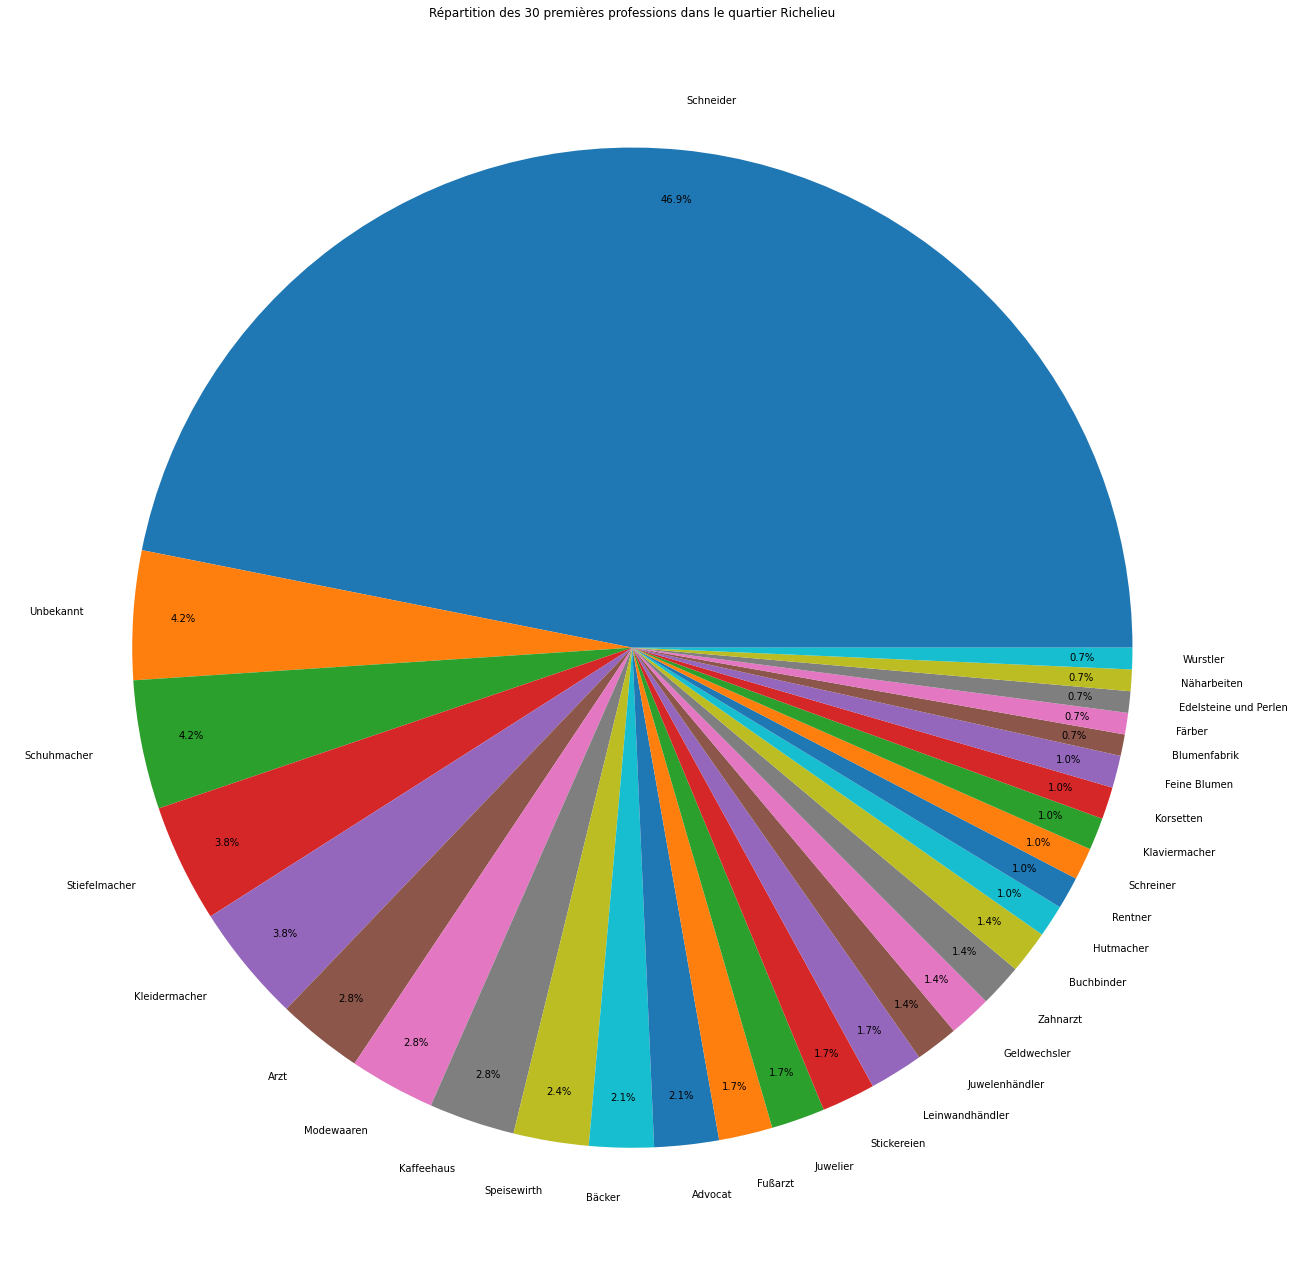

288


In [8]:
count = data.value_counts('profession_verbatim', ascending = False).head(30)

plt.figure(figsize=(26,23))
plt.pie(count, labels=count.index,autopct='%1.1f%%',pctdistance=0.9)
plt.title('Répartition des 30 premières professions dans le quartier Richelieu')
plt.show()
print(sum(count))

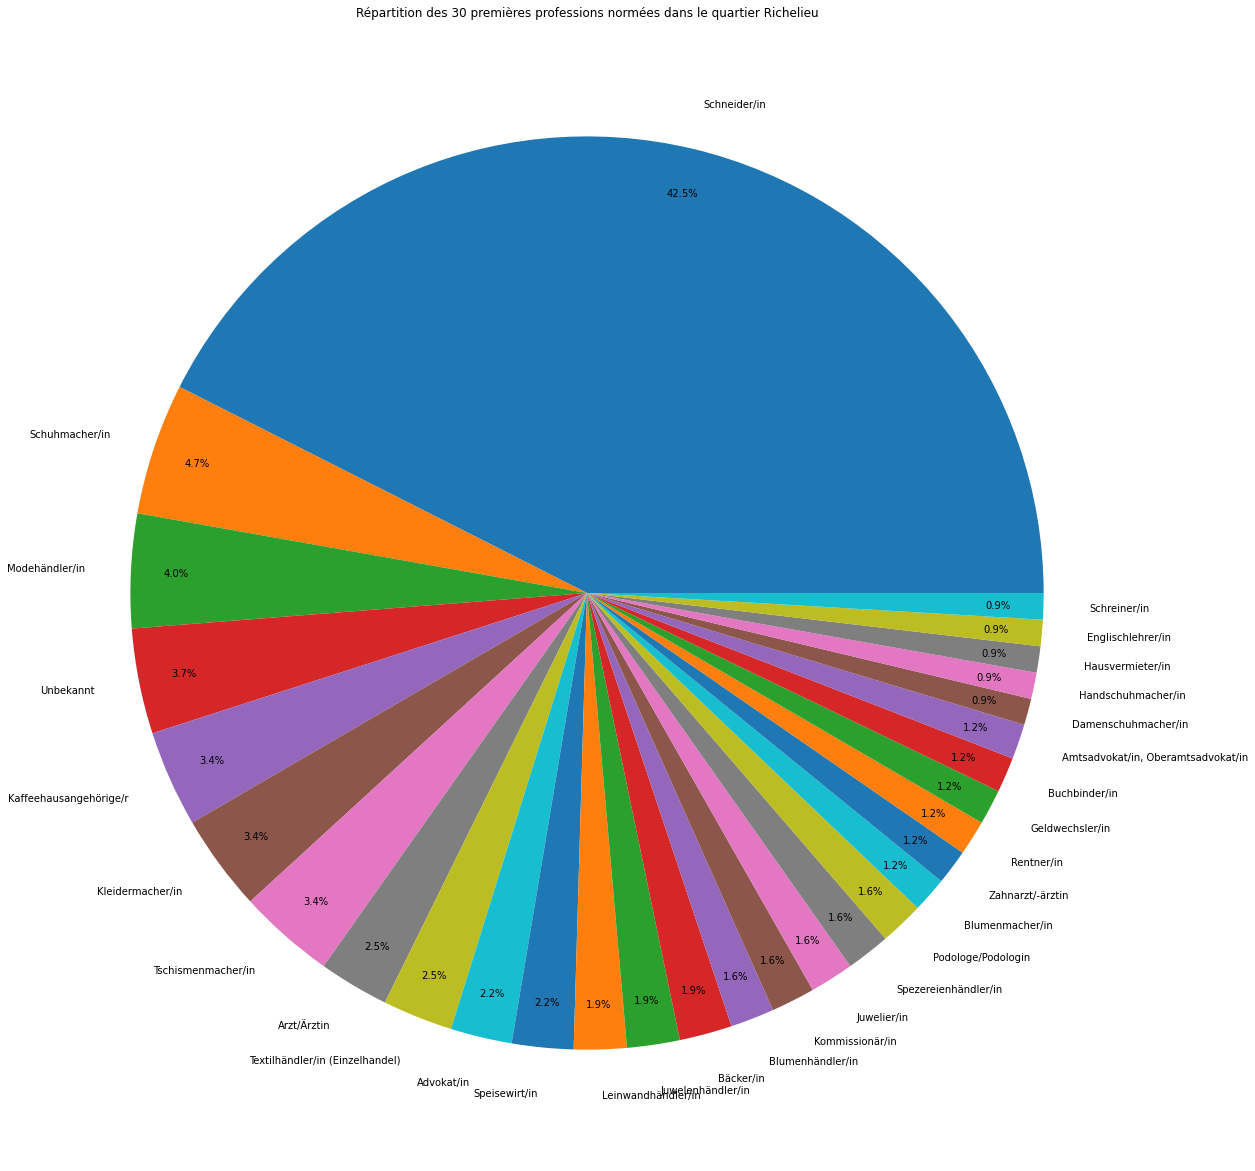

288


In [9]:
count_norm = data.value_counts('norm', ascending = False).head(30)

plt.figure(figsize=(24,21))
try:
    plt.pie(count_norm, labels=count_norm.index,autopct='%1.1f%%',pctdistance=0.9)
except TypeError:
    True
plt.title('Répartition des 30 premières professions normées dans le quartier Richelieu')
plt.show()
print(sum(count))

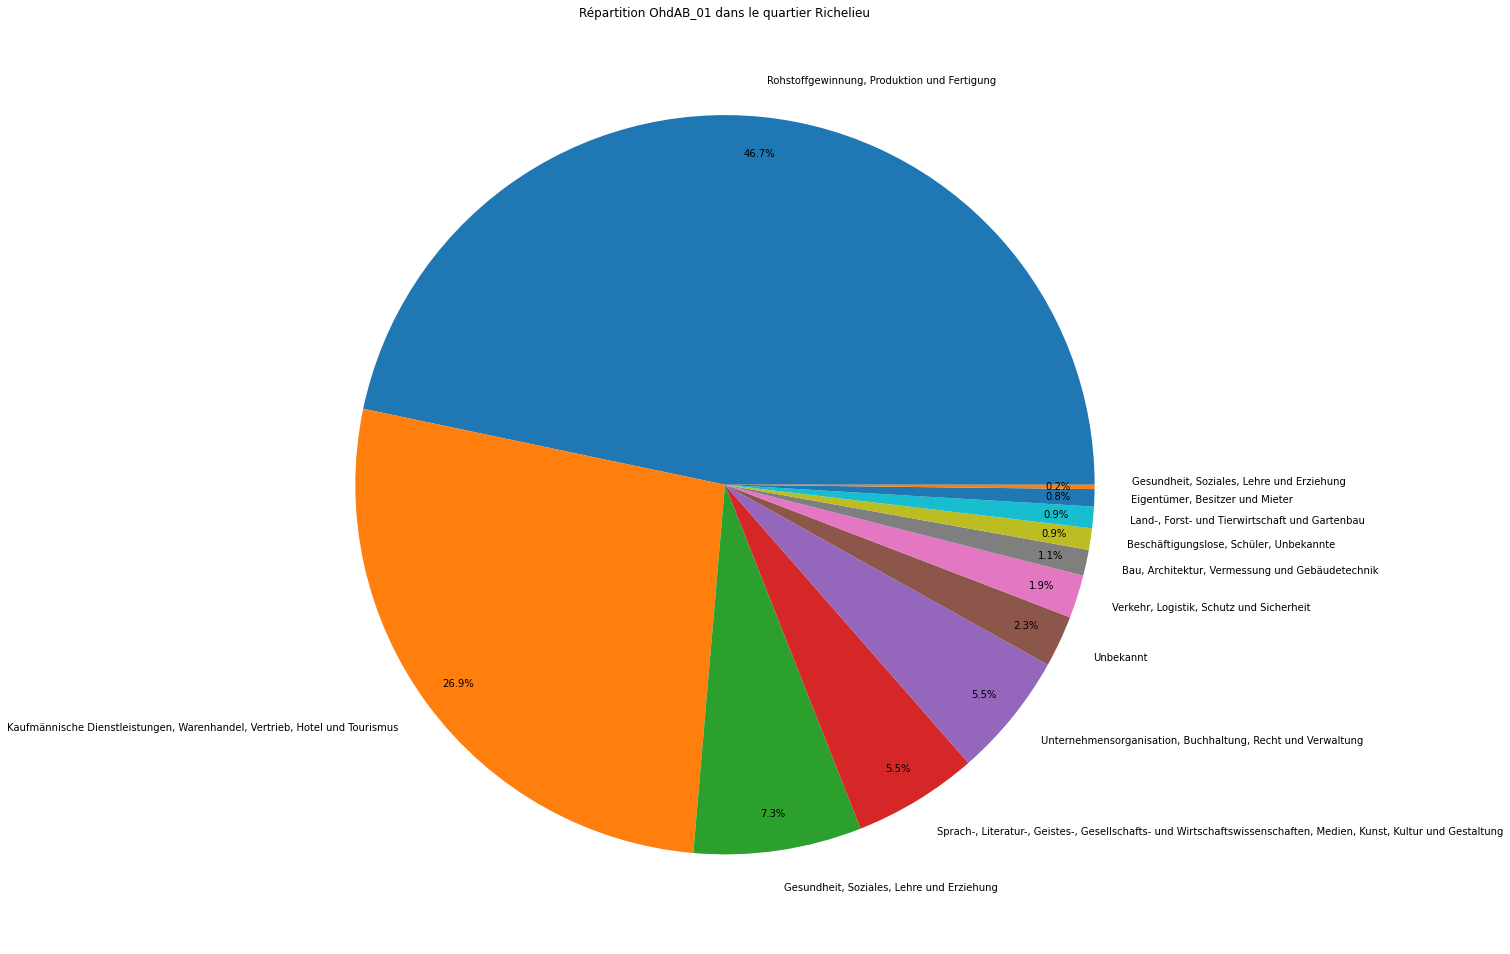

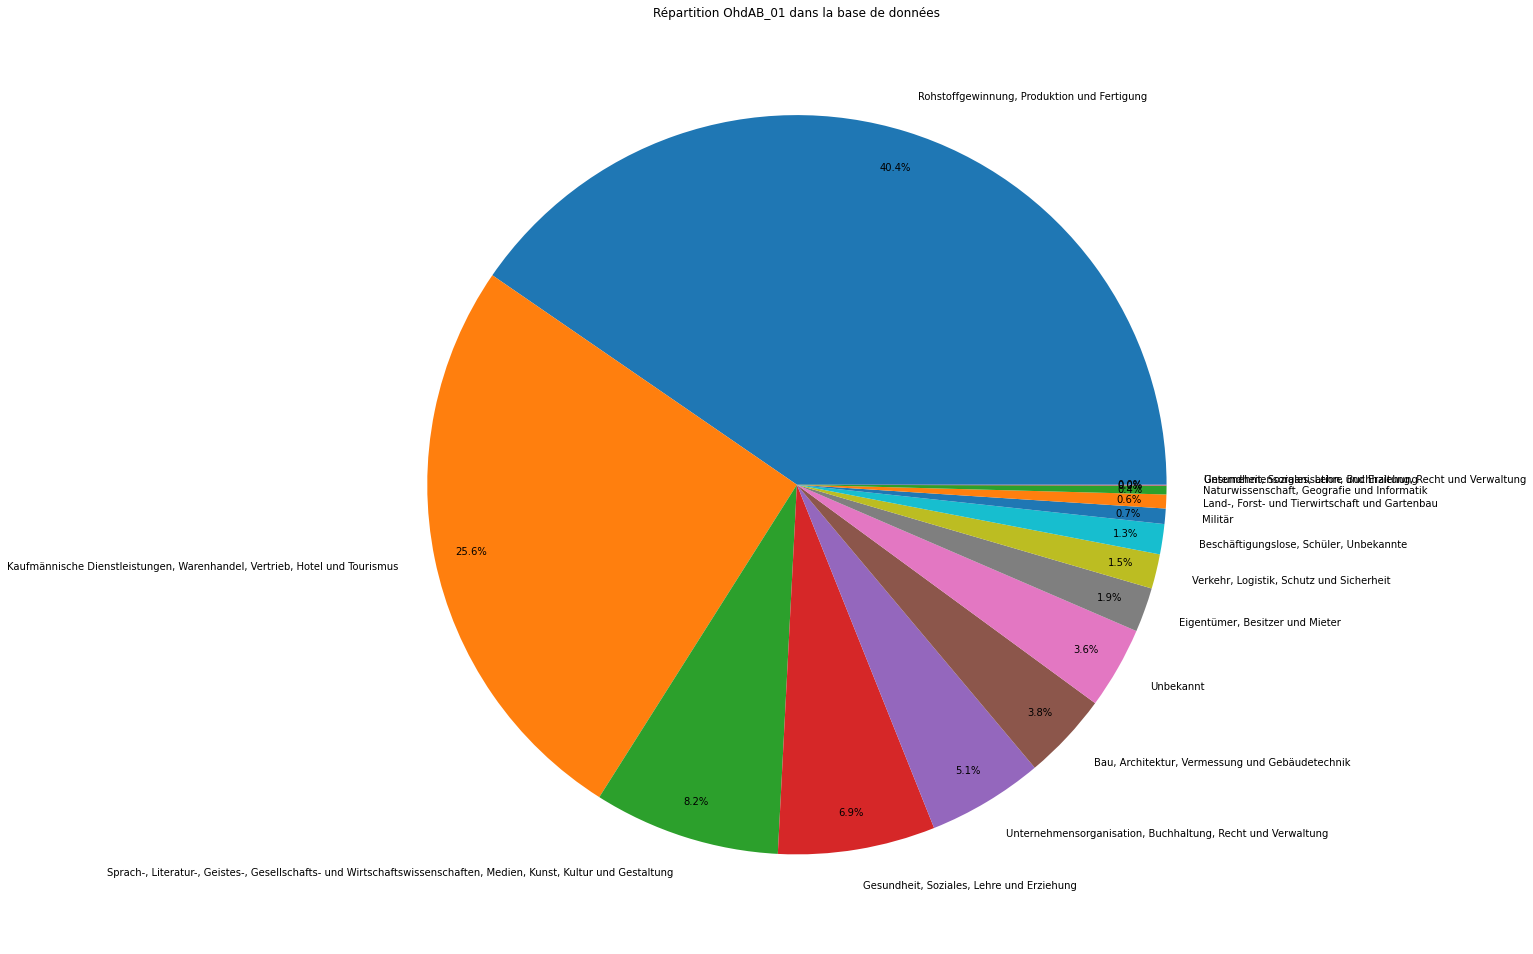

In [10]:
#pie chart de la catégorie OhdAB_01 dans le quartier Richelieu

count_ohdab01 = data.value_counts('OhdAB_01')

plt.figure(figsize=(20,17))
plt.pie(count_ohdab01, labels=count_ohdab01.index,autopct='%1.1f%%',pctdistance=0.9)
plt.title('Répartition OhdAB_01 dans le quartier Richelieu')
plt.show()

#pie chart de la catégorie OhdAB_01 dans la base de données

full_count_ohdab01 = full_data.value_counts('OhdAB_01')

plt.figure(figsize=(20,17))
plt.pie(full_count_ohdab01, labels=full_count_ohdab01.index,autopct='%1.1f%%',pctdistance=0.9)
plt.title('Répartition OhdAB_01 dans la base de données')
plt.show()

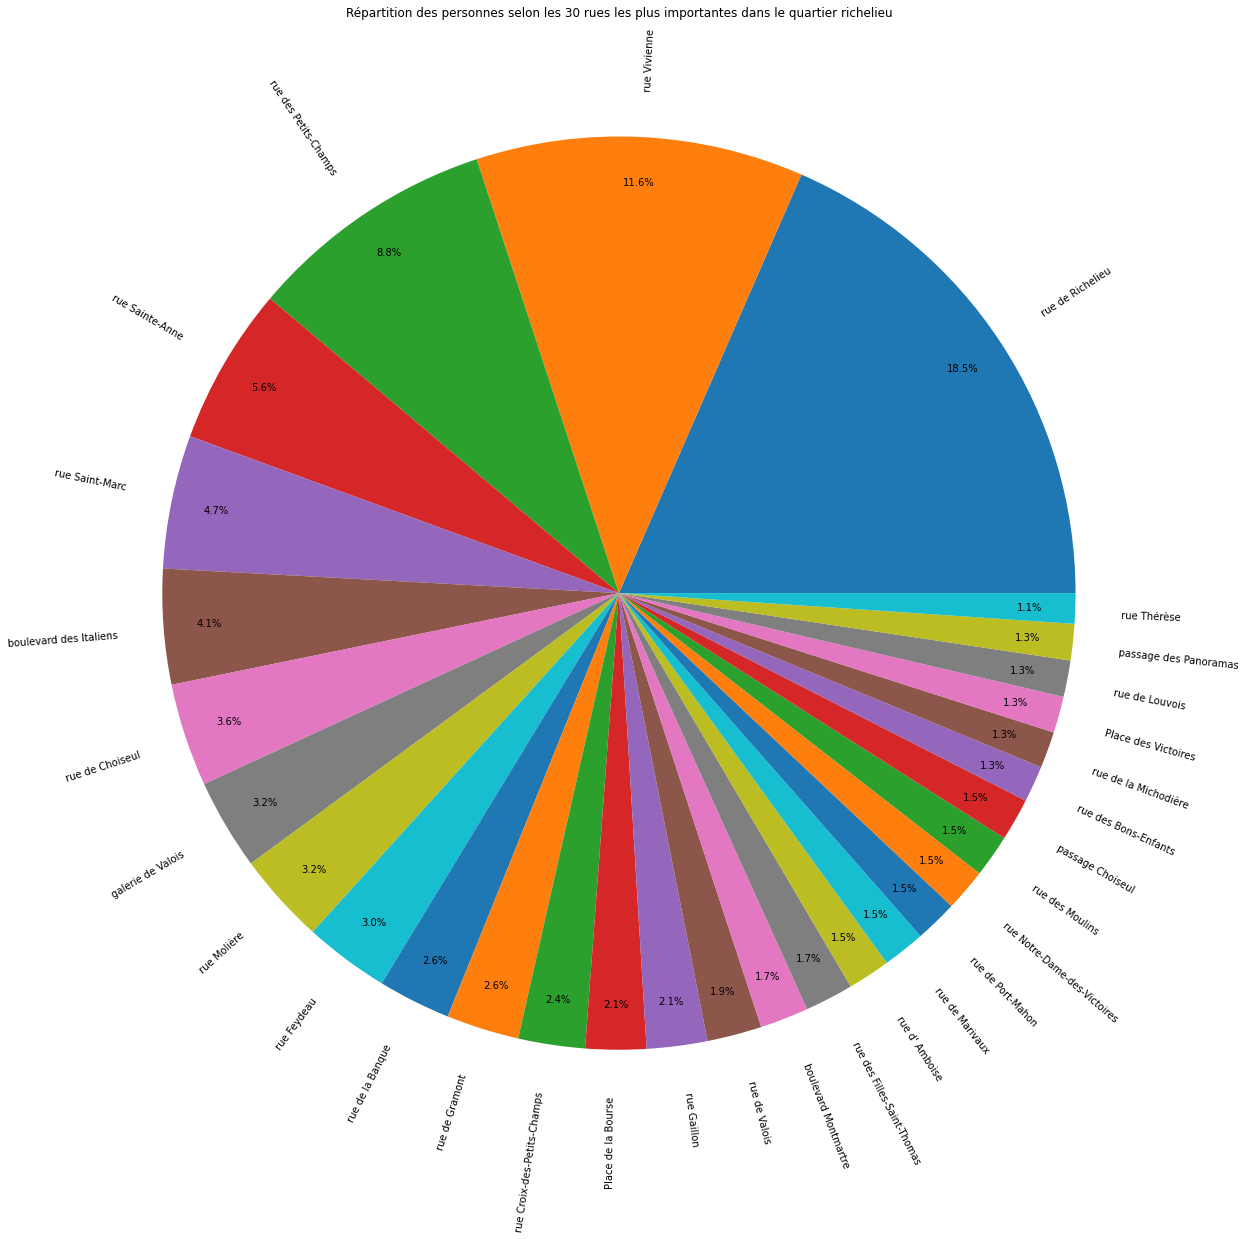

466


In [11]:
count_street = data.value_counts('name_new', ascending = False).head(30)

plt.figure(figsize=(24,21))
plt.pie(count_street, labels=count_street.index,autopct='%1.1f%%',pctdistance=0.9, rotatelabels=True)
plt.title('Répartition des personnes selon les 30 rues les plus importantes dans le quartier richelieu')
plt.show()
print(sum(count_street))

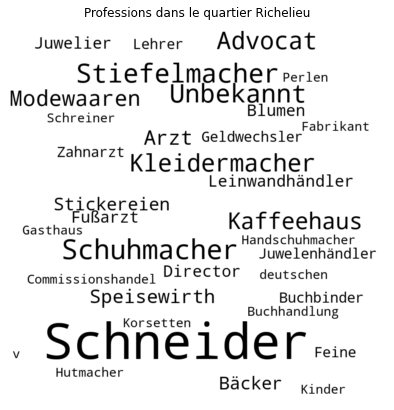

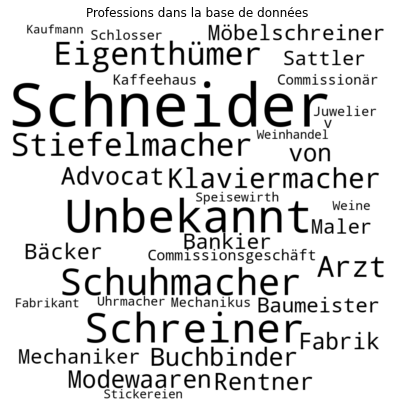

In [12]:
#wordcloud selon les professions dans le quartier Richelieu

test = " ".join(data.profession_verbatim)

stopwords = set(STOPWORDS)
stopwords.update(["und", "u","der", "de" ,"des", "für"])

wc = WordCloud(width=900,
    height=900,
    background_color='white',
    color_func=lambda *args, **kwargs: "black",
    max_words=35, 
    stopwords=stopwords, 
    prefer_horizontal=1)

wc.generate(test) 
plt.figure(figsize=(10,7))
plt.title('Professions dans le quartier Richelieu')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('profession_richelieu.png')
plt.show()

#wordcloud selon les professions dans la base de données

full_test = " ".join(full_data.profession_verbatim)

wc = WordCloud(width=900,
    height=900,
    background_color='white',
    color_func=lambda *args, **kwargs: "black",
    max_words=35, 
    stopwords=stopwords, 
    prefer_horizontal=1) 

wc.generate(full_test) 
plt.figure(figsize=(10,7))
plt.title('Professions dans la base de données')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('full_professions.png')
plt.show()

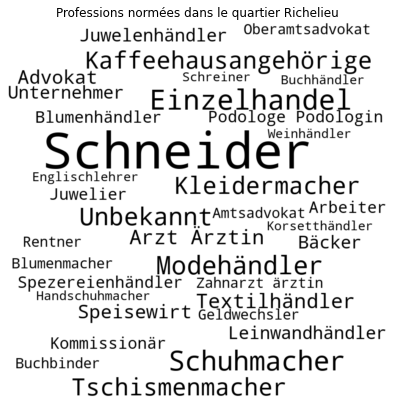

In [13]:
#wordcloud des professions normés dans le quartier Richelieu

text = " ".join(data.norm)

wc = WordCloud(width=900,
    height=900,
    background_color='white',
    color_func=lambda *args, **kwargs: "black",
    max_words=35, 
    stopwords=stopwords, 
    prefer_horizontal=1)

wc.generate(text)
plt.figure(figsize=(10,7))
plt.title('Professions normées dans le quartier Richelieu')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('norm_richelieu.png')
plt.show()


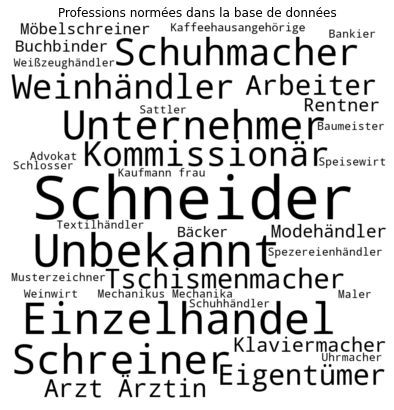

In [14]:
#wordcloud des professions normés dans la base de données

full_text = " ".join(full_data.norm)

wc = WordCloud(width=900,
    height=900,
    background_color='white',
    color_func=lambda *args, **kwargs: "black",
    max_words=35, 
    stopwords=stopwords, 
    prefer_horizontal=1)

wc.generate(full_text)
plt.figure(figsize=(10,7))
plt.title('Professions normées dans la base de données')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('full_norm.png')
plt.show()